In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
from newsapi import NewsApiClient

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
api_key = 'd68f0670f6d844d8ad1dd0c0e3020a4d'

In [5]:
# Create a newsapi client
api_client = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news = api_client.get_everything(q='bitcoin', language='en', page_size=100, sort_by='relevancy')

In [7]:
# Fetch the Ethereum news articles
ethereum_news = api_client.get_everything(q='ethereum',language='en', page_size=100, sort_by='relevancy')

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []
for article in bitcoin_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiment.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
  
    except AttributeError:
        pass       
    
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiment)
# reorder columns
cols = ['compound', 'negative', 'neutral', 'positive', 'text']
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]
bitcoin_sentiment_df.head()

,compound,negative,neutral,positive,text
0,-0.4767,0.094,0.906,0.000,"Authorities in Tampa, Florida have arrested a ..."
1,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec..."
2,-0.4019,0.074,0.926,0.000,"On July 15, a Discord user with the handle Kir..."
3,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi..."
4,0.6369,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiment.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_sentiment_df = pd.DataFrame(ethereum_sentiment)
# reorder columns
cols = ['compound', 'negative', 'neutral', 'positive', 'text']
ethereum_sentiment_df = ethereum_sentiment_df[cols]
ethereum_sentiment_df.head()

,compound,negative,neutral,positive,text
0,0.5719,0.000,0.868,0.132,According to a public letter from the U.S. Com...
1,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...
2,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...
3,0.3400,0.000,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...
4,0.5423,0.000,0.877,0.123,"August\r\n4, 2020\r\n5 min read\r\nOpinions ex..."


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,compound,negative,neutral,positive
count,100.000000,100.00000,100.000000,100.000000
mean,0.016271,0.05574,0.888700,0.055590
std,0.472122,0.07351,0.075441,0.053684
min,-0.897900,0.00000,0.642000,0.000000
25%,-0.401900,0.00000,0.847750,0.000000
50%,0.000000,0.00000,0.910000,0.063000
75%,0.507000,0.08850,0.927000,0.090000
max,0.788900,0.31400,1.000000,0.216000


In [11]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,compound,negative,neutral,positive
count,98.000000,98.000000,98.000000,98.000000
mean,0.074372,0.038459,0.907245,0.054316
std,0.403270,0.059087,0.080568,0.064740
min,-0.851900,0.000000,0.692000,0.000000
25%,-0.102700,0.000000,0.865000,0.000000
50%,0.000000,0.000000,0.919500,0.046500
75%,0.381775,0.072000,1.000000,0.089500
max,0.817600,0.262000,1.000000,0.270000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
stopwords

<WordListCorpusReader in '/Users/rach.solo/nltk_data/corpora/stopwords'>

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
# Create a list of the words
    sw = stopwords.words('english')
    
# Convert the words to lowercase/Remove the punctuation/Remove the stop words
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    lower_words = [word.lower() for word in words if word.lower() not in sw]
    
# Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in lower_words]
    
    return tokens

In [15]:
# Create a new tokens column for bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df['text'].fillna('').apply(tokenizer)
bitcoin_sentiment_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.4767,0.094,0.906,0.000,"Authorities in Tampa, Florida have arrested a ...","[authority, tampa, florida, arrested, yearold,..."
1,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec...","[casa, coloradobased, provider, bitcoin, secur..."
2,-0.4019,0.074,0.926,0.000,"On July 15, a Discord user with the handle Kir...","[july, discord, user, handle, kirk, made, enti..."
3,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...","[april, secret, service, seized, bitcoins, cla..."
4,0.6369,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...,"[bitcoin, bull, back, townthe, price, bitcoin,..."


In [16]:
# Create a new tokens column for ethereum
ethereum_sentiment_df['tokens'] = ethereum_sentiment_df['text'].fillna('').apply(tokenizer)
ethereum_sentiment_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.5719,0.000,0.868,0.132,According to a public letter from the U.S. Com...,"[according, public, letter, u, comptroller, cu..."
1,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[tldr, mega, blockchain, mastery, bundle, sale..."
2,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, bitcoin, whale, rarely, show, affe..."
3,0.3400,0.000,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,"[reutersrick, wilkingullimichael, novogratz, t..."
4,0.5423,0.000,0.877,0.123,"August\r\n4, 2020\r\n5 min read\r\nOpinions ex...","[august, min, readopinions, expressed, entrepr..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = []

for i in bitcoin_sentiment_df['tokens']:
    bitcoin_words = bitcoin_words + i

bitcoin_ngrams = Counter(ngrams(bitcoin_words,n=2))
print(dict(bitcoin_ngrams))

{('authority', 'tampa'): 1, ('tampa', 'florida'): 5, ('florida', 'arrested'): 3, ('arrested', 'yearold'): 1, ('yearold', 'alleged'): 1, ('alleged', 'mastermind'): 1, ('mastermind', 'behind'): 3, ('behind', 'twitter'): 1, ('twitter', 'bitcoin'): 1, ('bitcoin', 'hack'): 1, ('hack', 'targeted'): 1, ('targeted', 'several'): 1, ('several', 'highprofile'): 1, ('highprofile', 'account'): 1, ('account', 'july'): 1, ('july', 'th'): 1, ('th', 'name'): 1, ('name', 'h'): 1, ('h', 'char'): 2, ('char', 'casa'): 1, ('casa', 'coloradobased'): 1, ('coloradobased', 'provider'): 1, ('provider', 'bitcoin'): 1, ('bitcoin', 'security'): 1, ('security', 'service'): 1, ('service', 'launching'): 1, ('launching', 'managed'): 1, ('managed', 'service'): 1, ('service', 'allowing'): 1, ('allowing', 'customer'): 1, ('customer', 'buy'): 1, ('buy', 'hold'): 1, ('hold', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'using'): 1, ('using', 'external'): 1, ('external', 'custodian'): 1, ('custodian', 'like'): 1, ('li

In [19]:
# Generate the Ethereum N-grams where N=2
ethereum_words = []
for i in ethereum_sentiment_df['tokens']:
    ethereum_words = ethereum_words + i

ethereum_ngrams = Counter(ngrams(ethereum_words,n=2))
print(dict(ethereum_ngrams))

{('according', 'public'): 1, ('public', 'letter'): 1, ('letter', 'u'): 1, ('u', 'comptroller'): 1, ('comptroller', 'currency'): 1, ('currency', 'federal'): 1, ('federal', 'group'): 1, ('group', 'responsible'): 1, ('responsible', 'security'): 1, ('security', 'banking'): 1, ('banking', 'system'): 2, ('system', 'bank'): 1, ('bank', 'allowed'): 1, ('allowed', 'hold'): 1, ('hold', 'cryptocurrenciesthis'): 1, ('cryptocurrenciesthis', 'doe'): 1, ('doe', 'char'): 1, ('char', 'tldr'): 1, ('tldr', 'mega'): 1, ('mega', 'blockchain'): 1, ('blockchain', 'mastery'): 1, ('mastery', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'august'): 1, ('august', 'saving'): 1, ('saving', 'list'): 1, ('list', 'pricecash'): 1, ('pricecash', 'isnt'): 1, ('isnt', 'necessarily'): 1, ('necessarily', 'king'): 1, ('king', 'anymore'): 1, ('anymore', 'youve'): 1, ('youve', 'probably'): 1, ('probably', 'heard'): 1, ('heard', 'cryptocurrency'): 1, ('cryptocurrency', 'bloc'): 1, ('bloc', 'char'): 1, ('char', 'outspoken'): 1,

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_ngrams)

[(('satoshi', 'nakaboto'), 36),
 (('char', 'robot'), 18),
 (('robot', 'colleague'), 18),
 (('colleague', 'satoshi'), 18),
 (('nakaboto', 'writes'), 18),
 (('writes', 'bitcoin'), 18),
 (('every', 'fucking'), 18),
 (('fucking', 'daywelcome'), 18),
 (('daywelcome', 'another'), 18),
 (('another', 'edition'), 18)]

In [22]:
# Get the top 10 words for Ethereum
token_count(ethereum_ngrams)

[(('char', 'ethereum'), 17),
 (('ethereum', 'classic'), 11),
 (('char', 'bitcoin'), 6),
 (('decentralized', 'finance'), 6),
 (('btc', 'trading'), 5),
 (('trading', 'around'), 5),
 (('finance', 'defi'), 4),
 (('char', 'disclosurethe'), 4),
 (('disclosurethe', 'leader'), 4),
 (('leader', 'blockchain'), 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

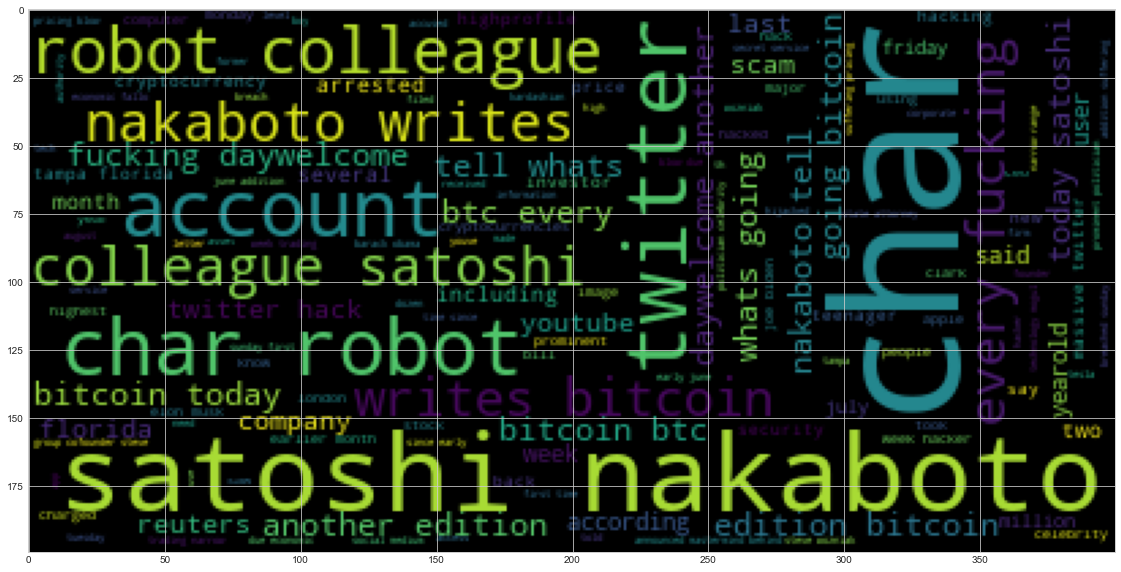

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(bitcoin_words))
plt.imshow(wc)

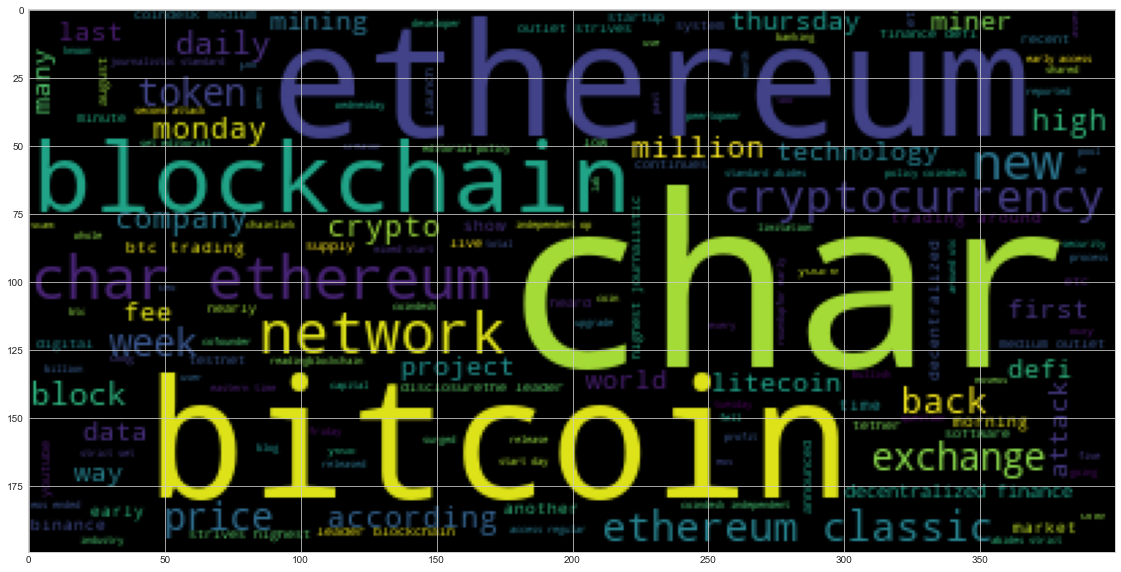

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(ethereum_words))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [33]:
# Concatenate all of the bitcoin text together
bitcoin_concat = ' '.join([i for i in bitcoin_sentiment_df['text']])

bitcoin_concat

'Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-profile accounts on July 15th, 2020. His name h… [+463 chars] Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars] On July 15, a Discord user with the handle Kirk#5270 made an enticing proposition. I work for Twitter, they said, according to court documents released Friday. I can claim any name, let me know if yo… [+3660 chars] In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett received a letter explaining that the Secret Service had recovered 100 of his Bitcoins. The letter cited… [+884 chars] The bitcoin bulls are back in town.\r\nThe price of bitcoin surged today by $1,268.19, reaching a six-month high of $11,203.90, or a one-day 

In [29]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_concat)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [30]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
for entity in doc.ents:
    print(entity.text, entity.label_)

Tampa GPE
Florida GPE
17-year-old DATE
Twitter Bitcoin ORG
July 15th, 2020 DATE
Colorado GPE
Coinbas PERSON
July 15 DATE
Discord ORG
Friday DATE
yo PERSON
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark ORG
NYT ORG
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
Bitcoin GPE
Apple ORG
YouTube ORG
Steve Wozniak PERSON
this week DATE
YouTube ORG
YouTube LAW
Wozniak ORG
months DATE
Guy PERSON
ZIP ORG
Last week DATE
over 100 CARDINAL
today DATE
last week DATE
bitcoin GPE
today DATE
Q2 CARDINAL
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
Earlier this month DATE
Elon Musk PERSON
Joe Biden PERSON
Barack Obama PERSON
Bill Gates PERSON
Jeff Bezos PERSON
Andrew Warren PERSON
today DATE
30 CARDINAL
17-year-old DATE
Tampa GPE
Florida GPE
+2500 CARDINAL
VPN ORG
Reuters ORG
several weeks DATE
bitcoin GPE
10,000 MONEY
Sunday DATE
first ORDINAL
early 

---

## Ethereum NER

In [35]:
# Concatenate all of the bitcoin text together
ethereum_concat = ' '.join([i for i in ethereum_sentiment_df['text']])

ethereum_concat

'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.\r\nThis doe… [+1760 chars] TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn\'t necessarily king anymore. You\'ve probably heard that cryptocurrency and bloc… [+1286 chars] An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.\r\nThe pseudonymous trader known as Joe007 says UNUS SED LEO (LEO) may be a soli… [+1503 chars] REUTERS/Rick Wilking\r\n<ul><li>Michael Novogratz told Bloomberg the price of gold could certainly get up to $3,000.\xa0</li><li>The Galaxy Digital CEO and co-founder said the next Fed meeting could be th… [+1981 chars] August\r\n4, 2020\r\n5 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIf you have been an activ

In [36]:
# Run the NER processor on all of the text
ether_doc = nlp(ethereum_concat)

# Add a title to the document
ether_doc.user_data['title'] = 'Ethereum NER'

In [37]:
# Render the visualization
displacy.render(ether_doc, style='ent')

In [38]:
# List all Entities
for entity in ether_doc.ents:
    print(entity.text, entity.label_)

the U.S. Comptroller of the Currency ORG
The Mega Blockchain Mastery Bundle ORG
29.81 MONEY
August 17 DATE
97% PERCENT
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
soli NORP
+1503 WORK_OF_ART
Rick Wilking PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
Fed ORG
August DATE
4, DATE
2020 DATE
5 CARDINAL
Wozniak ORG
Bitcoin GPE
YouTube LAW
4 CARDINAL
4 CARDINAL
Apple ORG
Steve Wozniak PERSON
YouTube ORG
Crypto LOC
the last week DATE
Bitcoin GPE
18% PERCENT
the last seven days DATE
over 30% PERCENT
the last week DATE
first ORDINAL
Bitcoin GPE
11,000 MONEY
nearly a year DATE
Tuesday DATE
US GPE
Satoshi Nakaboto PERSON
Bitcoin BTC GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
first ORDINAL
WordStar PRODUCT
Apple ORG
Medalla PERSON
the Ethereum Foundation ORG
ul><li PERSON
Medalla PERSON
Eth PERSON
Aug. 2 DATE
418 MONEY
5 minutes TIME
25% PERCENT
Binance Futures ORG
ETH ORG
as low as $302 MONEY
385 MONEY
10 minutes TIME
one hundred dollar MONEY